<a href="https://colab.research.google.com/github/minaraaz/MachineLearningCourse/blob/master/HW3/HW3_Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3
In this colab I visualize heatmaps of class activation for the the model obtained in Problem 2.

In [0]:
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten

# Loading the model from Drive
[Here](https://drive.google.com/file/d/1p0hGJNOqY0dJEAIUNdwMPrE5KxxWvV3t/view?usp=sharing) is the model saved in the Drive.

In [0]:
from keras.models import load_model
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)
file_obj = drive.CreateFile({'id': '1p0hGJNOqY0dJEAIUNdwMPrE5KxxWvV3t'})                       
file_obj.GetContentFile('VGG19-Finetuned-Cats_and_Dogs.h5')


In [0]:
model = load_model('VGG19-Finetuned-Cats_and_Dogs.h5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Loading test images

In [0]:
!wget https://github.com/minaraaz/MachineLearningCourse/blob/master/HW3/cat.jpg?raw=true \
  -O cat.jpg
!wget https://github.com/minaraaz/MachineLearningCourse/blob/master/HW3/dog.jpg?raw=true \
  -O dog.jpg
!wget https://github.com/minaraaz/MachineLearningCourse/blob/master/HW3/dog2.jpg?raw=true \
  -O dog2.jpg
!wget https://github.com/minaraaz/MachineLearningCourse/blob/master/HW3/catdog.jpg?raw=true \
  -O catdog.jpg
  
  

--2019-04-16 22:15:35--  https://github.com/minaraaz/MachineLearningCourse/blob/master/HW3/cat.jpg?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/minaraaz/MachineLearningCourse/raw/master/HW3/cat.jpg [following]
--2019-04-16 22:15:35--  https://github.com/minaraaz/MachineLearningCourse/raw/master/HW3/cat.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/minaraaz/MachineLearningCourse/master/HW3/cat.jpg [following]
--2019-04-16 22:15:35--  https://raw.githubusercontent.com/minaraaz/MachineLearningCourse/master/HW3/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.

In [0]:
img_path1 = 'cat.jpg'
img_path2 = 'dog.jpg'
img_path3 = 'dog2.jpg'
img_path4 = 'catdog.jpg'

# Heatmap Visuzalization

In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
    img = image.load_img(img_path, target_size=(224, 224))
    
    plt.imshow(img)
    plt.grid(None)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    preds = model.predict(x)
    print "Predicted: [('Cat','" + str(preds[0,0]) + "'),('Dog','" + str(preds[0,1]) + "')]"
    print
    class_index = np.argmax(preds[0])
    class_output = model.output[:, class_index]
    last_conv_layer = model.get_layer('block5_conv4')
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])  
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    plt.matshow(heatmap)
    plt.grid(None)
    plt.show()
   
    show_superimposed_image(img_path, heatmap)

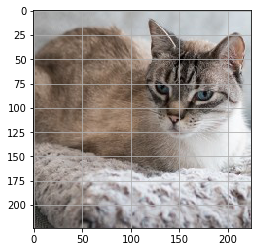

Predicted: [('Cat','1.0'),('Dog','0.0')]



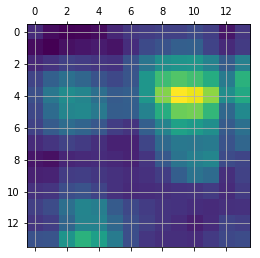

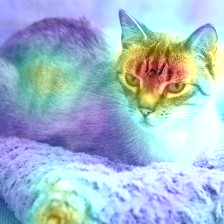

In [0]:
process_image(img_path1)

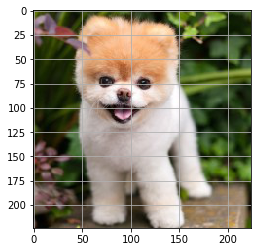

Predicted: [('Cat','0.0'),('Dog','1.0')]



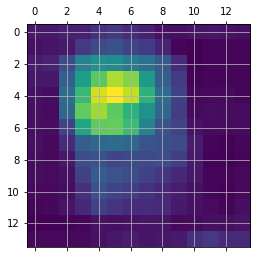

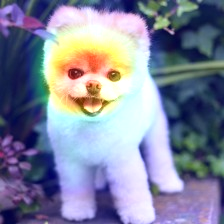

In [0]:
process_image(img_path2)

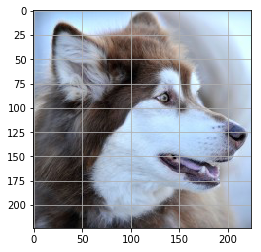

Predicted: [('Cat','0.0'),('Dog','1.0')]



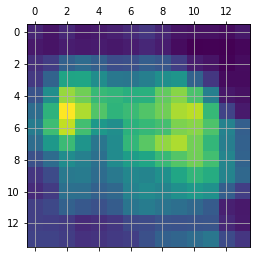

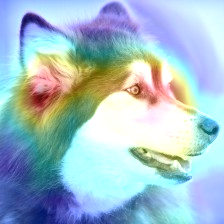

In [0]:
process_image(img_path3)

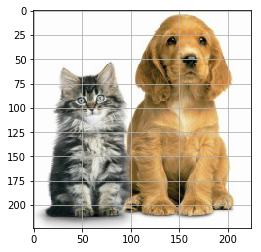

Predicted: [('Cat','0.0'),('Dog','1.0')]



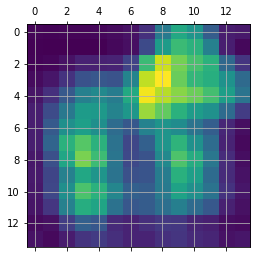

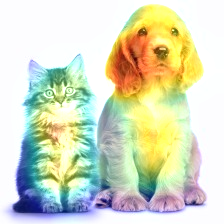

In [0]:
process_image(img_path4)